**Copyright: © NexStream Technical Education, LLC**.
All rights reserved

**Gradient Descent and the Perceptron**

In this project, you will integrate gradient descent to a perceptron model with logistic regression (i.e. using the sigmoid activation and binary cross entropy cost function) on a synthetic dataset. Then in a subsequent assignment you will extend what you develop here and apply it to an image dataset.  The code you will develop implements an unvectorized version (Part-1), then a vectorized version (Part-2), and finally you will compare the efficiency between the two versions (Part-3).
The code developed in this unit will form the base for the backpropagation step which will be integrated into your DNN framework.

Please complete the following steps in the Colab Script.  The reference script below provides template code and hints to help with each step.

The following instructions are identified as Steps in the text cells preceding their corresponding code cell. Read through the instructions and write/fill-in the appropriate code in the cells.



##Part A:  Dataset Creation and Preprocessing

In this section, you will set up your drive, create a synthetic dataset, and preprocess the data in preparation for the regression and descent algorithms.  Please follow the steps outlined in the following cells and fill in your code where prompted.

**Step A-1:**
- Mount your Google drive.
- Upload the file tf_image_utils.py from the materials folder provided with this course and copy it to your project directory.
- Import the numpy module as np and the random module.
- Initialize a random seed.  This will be used for checking your outputs.

In [179]:
from google.colab import drive
drive.mount('/content/drive')

#See the reference cp command below.  Update this to your own drive path.
#cp drive/MyDrive/MachineLearning/DNN/tf_image_utils.py .

!cp '/content/drive/MyDrive/dnnutilityfiles/tf_image_utils.py' .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
# Imports

import numpy as np
import tensorflow as tf
import tf_image_utils
from tf_image_utils import load_data, preprocess, as_numpy
import tensorflow_datasets as tfds


**Step A-2:** Create a Synthetic Dataset

- Use the following code cells to generate synthetic data and create the train and test datasets.
- Write the function "see_shapes" to print the shapes of the datasets, then call the function to display the shapes.
Your shapes output should be the following:
  - Number of training examples: m_train =  80
  - Number of testing examples: m_test =  20
  - Height/Width of each image: num_px =  24
  - Each image is of size:  24 x 24
  - X_train shape:  (80, 24, 24)
  - Y_train shape:  (1, 80)
  - X_test shape:  (20, 24, 24)
  - Y_test shape:  (1, 20)
- Verify the doctest modules included in the cells run without any errors

In [181]:
# Creates synthetic data.

def create_X(m):
  np.random.seed(3) # do not change - for grading purposes
  data = np.zeros((m, 24, 24))
  for i in range(m):
    for j in range(24):
      data[i][j] = np.random.randint(0, 255, 24)
  return np.array(data)

In [182]:
# Creates synthetic labels. ###########################

#def create_Y(m, X):
#  labels = np.zeros((1, m))
#  for i in range(m):
#    if (X[i][0][0] % 2 == 0):
#     labels[:,i] = 1
#   else:
#      labels[:,i] = 0
#  return labels

In [183]:
def create_Y(m, X):
    labels = np.zeros((1, m))
    for i in range(m):
        # Force binary labels (0 or 1)
        labels[0, i] = 1 if (X[i][0][0] % 2 == 0) else 0  # Use [0,i] for proper indexing
    return labels


In [184]:
def create_dataset(m):
  X = create_X(m)
  Y = create_Y (m, X)
  return X, Y

In [185]:
X_train, Y_train = create_dataset(80)
X_test, Y_test = create_dataset(20)


In [186]:
# function to see the shapes of the data.
def see_shapes(X_train, X_test, Y_train, Y_test):

### BEGIN CODE HERE

  m_train = X_train.shape[0]
  m_test =  X_test.shape[0]
  image_size = X_train.shape[1]

  # print("m_train =", m_train)
  # print("m_test =",m_test)
  # print("image_size(height and width of each image) = ", image_size)

  return m_train, m_test, image_size

 ### END CODE HERE


In [187]:
# Call the function to see the shapes of your data.

### BEGIN CODE HERE

m_train, m_test, image_size = see_shapes(X_train, X_test, Y_train, Y_test)

### END CODE HERE

print ("Number of training examples: m_train = ", m_train)
print ("Number of testing examples: m_test = ", m_test)
print ("Height/Width of each image: num_px = ", image_size)
print ("Each image is of size: ", image_size, "x", image_size)
print ("X_train shape: ", X_train.shape)
print ("Y_train shape: ", Y_train.shape)
print ("X_test shape: ", X_test.shape)
print ("Y_test shape: ", Y_test.shape)

import doctest
"""
  >>> print(m_train)
  80
  >>> print(m_test)
  20
  >>> print(image_size)
  24
  >>> print (X_train.shape)
  (80, 24, 24)
  >>> print (Y_train.shape)
  (1, 80)
  >>> print (X_test.shape)
  (20, 24, 24)
  >>> print (Y_test.shape)
  (1, 20)
"""

doctest.testmod()

Number of training examples: m_train =  80
Number of testing examples: m_test =  20
Height/Width of each image: num_px =  24
Each image is of size:  24 x 24
X_train shape:  (80, 24, 24)
Y_train shape:  (1, 80)
X_test shape:  (20, 24, 24)
Y_test shape:  (1, 20)


TestResults(failed=0, attempted=7)

**Step A-3 :** Preprocess the datsets - flatten, normalize
- Write the function "flatten" to flatten the dataset then call the function to see the shapes of the flattened data.   A trick to accomplish this in a single line is to set X_train = X_train.reshape(X_train.shape[0], -1).T. What is going on in this line? First, we call the .reshape method on X_train to begin the process of reshaping it. Then, we say that we want the first dimension of our new X_train to be the same as the first dimension of the old X_train. That is, we say that we want the first dimension of X_train to remain “m”, or the number of examples in the set. Then, the “-1” returns the product of all other dimensions. This gives us a matrix of 80 rows by 576 columns. The final step is to transpose the matrix by using the .T method, which switches the number of rows and columns. Do the same for X_test and then run the cell to call the flatten() function.

- You should see the following output:
  - Flattened X_train shape: (576, 80)
  - Y_train shape: (1, 80)
  - Flattened X_test shape: (576, 20)
  - Y_test shape: (1, 20)

- Write the function "normalize" to normalize the dataset then call the function to see the shapes of the flattened data. That is, divide each of the samples by the maximum value corresponding to the size of the pixels (in this case, it'll be 2^8 - 1 or 255).
- Verify the doctest modules run for both the flatten and normalize calls without any errors

In [188]:
# Flatten the dataset.
def flatten(X_train, X_test):

  ### BEGIN CODE HERE ###

  X_train = X_train.reshape(X_train.shape[0],-1).T
  X_test =  X_test.reshape(X_test.shape[0],-1).T
  return X_train, X_test

  ### END CODE HERE ###


In [189]:
# Call the function to flatten the datasets.

### BEGIN CODE HERE

X_train, X_test= flatten(X_train, X_test)
### END CODE HERE

print ("Flattened X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("Flattened X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

import doctest
"""
  >>> print(X_train.shape)
  (576, 80)
  >>> print(Y_train.shape)
  (1, 80)
  >>> print(X_test.shape)
  (576, 20)
  >>> print (Y_test.shape)
  (1, 20)
"""

doctest.testmod()


Flattened X_train shape: (576, 80)
Y_train shape: (1, 80)
Flattened X_test shape: (576, 20)
Y_test shape: (1, 20)


TestResults(failed=0, attempted=4)

In [191]:
def normalize(X_train, X_test):
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    return X_train, X_test


In [192]:
# Call your normalization function.

### BEGIN CODE HERE

X_train, X_test = normalize(X_train, X_test)

### END CODE HERE

import doctest
"""
  >>> print(round(X_train[0][3], 2))
  0.12
  >>> print(round(Y_train[0][4], 2))
  1.0
  >>> print(round(X_test[0][0], 2))
  0.42
  >>> print (round(Y_test[0][1], 2))
  0.0
"""

doctest.testmod()



TestResults(failed=0, attempted=4)

## Part 1:  Unvectorized Implementation

In this section, you will implement unvectorized gradient descent.  Please follow the steps outlined in the following cells and fill in your code where prompted.

First, take a look at the pseudocode overview. This is the skeleton around which you should build your code. Make sure to refer back to this cell throughout if you get stuck, and for further clarification, refer back to the lecture video on Gradient Descent

An important note is that this is not a completely unvectorized implementation. You will be using vectors for the weights and gradients, but in conjunction with for loops. However, as you will see, this method is much less efficient than the fully vectorized approach you will implement later.


**Pseudocode Overview**

In [193]:
### PSEUDOCODE for unvectorized gradient descent

# Extract number of examples and number of features from X_train
# Initialize parameters
# Initialize list of costs

# Loop over iterations
# Initialize gradients vector
# Initialize cost accumulator
  # Loop over examples
    # Index into dataset to extract a single example's feature vector and label
    # Compute forward propagation steps to find the activation for this example
    # Compute the cost for this example and add it to the cumulative total
    # Calculate the derivative dz for this example

      # Loop over features
        # Calculate the derivative of each weight using its associated feature vector

    # Add the derivative with respect to the bias for that example to a cumulative total

  # Divide the cost and the gradients by the number of examples m to find the average cost and average update amount per weight.
  # Loop over features.
    # Update the weights.
  # Update the bias.

  # Append the cost for the iteration to the list.

# Return the learned parameters and the list of costs.

**Step 1-1** : Initialization and Example Extraction
Let’s begin by defining functions which initialize our parameters and extract a single example from the train set. Each example in our training data has 576 features, which means there will be one weight associated with each. While there are many ways of initializing weights, we are going to keep things simple by simply creating an array of 576 random numbers (multiplied by 0.01 to keep them small) as our weights vector. We can use the built-in numpy function np.random.randn to do this. You will need to pass the number of values (i.e. the number of weights) that you want in your array to randn(). When you can, try to avoid hard coding. For example, instead of hard coding the shape of the weights vector w as (576, 1), use a variable instead for the number of features in X_train. You can, however, just go ahead and set b=0, since this is a simple perceptron model (and so there will only be one bias since there is one node). Return the initialized w and b from this function.

Then call the initialize_parameters function and generate 5 weights.



In [194]:
# Initialize weights and biases.
def initialize_parameters(dim):
  np.random.seed(3) #do not change - for grading purposes

  w = np.random.randn(dim,1) * 0.01
  b = 0


  return w, b

In [195]:
# Test for correct output.

w, b = initialize_parameters(5)
print ("w: ", w)
print ("b: ", b)


import doctest

"""
  >>> print(np.round(w[0], 3))
  [0.018]
  >>> print(np.round(w[4], 3))
  [-0.003]
  >>> print(np.round(b, 1))
  0
"""

doctest.testmod()




w:  [[ 0.01788628]
 [ 0.0043651 ]
 [ 0.00096497]
 [-0.01863493]
 [-0.00277388]]
b:  0


TestResults(failed=0, attempted=3)

**Step 1-2 :**  Extract an example (i.e. an input sample)
Next, let’s build a function to extract an example from the train set. Refer back to the pseudocode guide – you should see that this function will be called immediately after entering the for loop over the examples. Therefore, in a loop going from i=0 to i=m, we need a way to extract the ith example from the train set. To understand exactly what we are doing, let’s look back at the shapes of the data. After flattening, X_train is a matrix with 576 rows and 80 columns; that is, each column represents an example. So to extract a single example, we need to index the matrix by column. With numpy, we can index multidimensional arrays  by row and column. For example, if we want all the values in the 3rd column, we can index as follows: array[:,3]. Define the function extract() to return the ith column of X_train as x and the ith column of Y_train as y.


In [196]:
# Extract a single example.
def extract(X_train, Y_train, example):


  # Index into the array.
  x = X_train[:,example]
  y = Y_train[:,example]


  # Reshape
  x = x.reshape(x.shape[0], 1)
  return x, y

In [197]:
print('x:', X_train)
print('y:', Y_train)

x: [[0.41568627 0.89019608 0.6        ... 0.69019608 0.24705882 0.94117647]
 [0.59607843 0.70980392 0.0627451  ... 0.83921569 0.23529412 0.09411765]
 [0.97647059 0.11372549 0.68627451 ... 0.45882353 0.10980392 0.61568627]
 ...
 [0.45882353 0.76862745 0.18431373 ... 0.81568627 0.97254902 0.15294118]
 [0.42352941 0.91764706 0.79607843 ... 0.         0.57254902 0.85490196]
 [0.58039216 0.67058824 0.00784314 ... 0.98431373 0.16470588 0.14117647]]
y: [[1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1.
  1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
  0. 1. 0. 1. 1. 1. 0. 1.]]


In [198]:
# Test for correct output.

x, y = extract(X_train, Y_train, 0)
#print ("x: ", x)
#print ("y: ", y)


import doctest

"""
  >>> print(np.round(x[17], 3))
  [0.651]
  >>> print(np.round(x[50], 3))
  [0.31]
  >>> print(np.round(y, 1))
  [1.]
"""

doctest.testmod()


TestResults(failed=0, attempted=3)

### Forward Propagation

**Step 1-3** :
Now let’s compute the forward propagation steps. Let’s begin by defining a helper functions to compute activation. We’ll be using the sigmoid activation function for this model. Define a function which return the sigmoid of the input. You can see the formula for the sigmoid function on the slide.

Refer back to the pseudocode guide to remind yourself of where this feedforward function should go. We will be performing the feedforward step for a single example. That means we need to calculate the activation for that single example, which is a column vector of features we have extracted. First, calculate z by multiplying each weight by its associated feature in the example, and then adding the bias. An efficient way to do this is by calculating the dot product of the weights vector and the example feature vector, utilizing numpy (in a preview of the vectorization methods we will use later!).  The dot product of two vectors [a, b, c] and [x, y, z] is defined as (ax + by + cz). Notice that this is exactly what we want to achieve. Numpy’s np.dot() function computes matrix multiplication for 2D arrays. Right now, we have two 2D arrays, both as column vectors: w, of shape (576, 1) and x, of shape (576, 1). How can we use matrix multiplication to return the dot product of these two vectors?

It turns out there is nice relationship between the dot product and matrix multiplication. We can rewrite a.b as a*b.T. That is, the dot product of a and b is the same as a multiplied by b transpose. Recall that transposing a vector means to switch its dimensions (i.e. a 2x3 vector becomes a 3x2 vector). So, let’s go ahead and calculate the dot product of the weights w and the example x by passing w.T and x as arguments to np.dot. Recall from the unit on linear algebra that the order of matrix multiplication is very important. Np.dot(w.T, x) will give you a different result to np.dot(x, w.T). Think carefully about what exactly we want to achieve, and try writing out an example if you are still stuck on which order to use. Don’t forget to add the bias to the result of the dot product! Finally, pass z to sigmoid_activation to compute the activation for this example. Overall, the feedforward function should take in w, b, and x as arguments and return the activation a.


In [199]:
# Helper function for activation.
def sigmoid_activation(z):


  #  activation = 1/(1+e^-z)
  z = np.clip(z, -500, 500)
  a = 1/(1+np.exp(-z))


  return a

In [200]:
# Test for correct output.

a = sigmoid_activation(0)


import doctest

"""
  >>> print(np.round(sigmoid_activation(0), 2))
  0.5
  >>> print(np.round(sigmoid_activation(.7), 2))
  0.67
  >>> print(np.round(sigmoid_activation(-3), 2))
  0.05
"""

doctest.testmod()

TestResults(failed=0, attempted=3)

In [201]:
def feedforward(w, b, x):

  ### EBGIN CODE HERE
  # Forward propagation.
  z = np.dot(w.T, x) + b
  a = sigmoid_activation(z)

  ### END COD HERE

  return a

### Cost Computation

**Step 1-4** :

Next, let’s see how to compute the cost. Because we are implementing unvectorized gradient descent, you will find that it is easier not to write a function to calculate the cost. Nonetheless, let’s see how the cost is calculated. First, notice that we have declared epsilon to be a very small value (1e-8). We need this to prevent division by zero in the cost calculation. Since we are performing binary classification, we will want to use the binary cross-entropy loss function.
$$J=\sum [ylog(a) + (1-y)log(1-a)] $$
We then call np.squeeze on J to give the cost for broadcasting purposes – more on this later when we vectorize!
https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html

In [202]:
# Initializations for test output.
# Do not change - for grading purposes
J = 0
a = np.array([0.839])
y = np.array([1.])

# Calculate cost.
epsilon = 1e-8
J += y * np.log(a + epsilon) + (1 - y) * np.log(1 - a + epsilon)
cost = np.squeeze(J)   #call np.squeeze on J

#print(cost)

import doctest

"""
  >>> print(np.round(cost, 3))
  -0.176
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

### Derivatives and Backpropagation

**Step 1-5** :

Finally, let’s consider the backpropagation and weight update steps. Similar to cost computation, we are mostly going tp avoid explicit functions here, since the backpropagation steps are awkwardly divided across for loops in unvectorized descent. The one function we will define, however, is a simple one which takes in the activation a and the corresponding label y for our chosen example, and calculates the derivative of the cost with respect to z. We won’t go into the details of the derivation here, but it turns out that dz = a – y.

We can calculate the derivative of J with respect to the ith weight dwi by calculating dwi = ith feature of x * dz.

We’ll complete weight update within the algorithm itself.


In [203]:
# Calculate derivative of the cost with respect to z.
def calc_dz(a, y):

  dz = a - y

  return dz

In [204]:
# Test output.

dz = calc_dz(a, y)


import doctest

"""
  >>> print(np.round(dz, 3))
  [-0.161]
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

You will complete the rest of the backpropagation steps inside the descent algorithm itself. Typically, we would create functions to perform backpropagation for us; however, since we are implementing unvectorized descent, there is no clean way to do this.

### Full Algorithm
**Step 1-6** :

We’re now ready to put everything together. You will want to refer back to the pseudocode guide regularly. First, let’s extract the number of examples and the number of features per example from X_train. We can do this by indexing into the shape of X_train. Refer back to the output of the flatten() function to see the shape of X_train after preprocessing.. Alternatively, make a new cell and run X_train.shape to work out how to index into it. Next, let’s initialize our parameters w and b using the function we built earlier. Remember that we need to pass a variable containing the number of features in the train set to this function – luckily, we have just extracted this! Now go ahead and initialize an empty list to which we can append the cost per iteration (this will be useful to keep track of how the cost changes during training).

We will now enter the first for loop which is for the number of iterations of descent. Inside this loop, we are going to implement one iteration of unvectorized descent. First, initialize the gradients. In code, the convention is to use dw1 for the derivative of the cost with respect to w1 (and so on). Initialize a gradients vector of zeroes using np.zeros as dw.  The ith component in this vector will be the derivative of the cost with respect to the ith weight. Remember to also initialize J, our cost accumulator, to 0.

Now we can enter the for loop over the examples (this should iterate from 0 to the number of examples). The first thing we need to do is extract a single example and its corresponding label. We can do this by calling our extract() function. Next, calculate the activation a by calling the feedforward() function.  Then, calculate the cost for this example using the code you wrote earlier. Don’t forget to include the small epsilon value and to call np.squeeze on J. Next, begin the process of backpropagation by using your calc_dz() function to calculate dz for this example.  Now we need to calculate the gradients with respect to the weights. First, loop over the features. Inside this loop, you will want to accumulate the values of dw1,dw2, and so on. We are accumulating here because, similarly to the cost computation, we are going to repeat this process for each example and thus calculate a cumulative total for all examples. Remember that dw1 = x1*dz. You should be able to use the for loop to iteratively calculate each derivative. Lastly, remember to accumulate db – however, remember to do this outside the for loop over features, but inside the for loop over examples. This is because we only want to calculate db once per example.

Now you will want to exit out of the for loop over examples too. The code you have written inside this loop will calculate the total cost for all examples, as well as the total gradient with respect to each parameter for all examples. That is why you must now divide each accumulator by the number of examples to get the average cost per example and average gradient with respect to each parameter. Lastly, we need to update the weights by looping over them and updating each weight with w = w – learning_rate*dw. Don’t forget to also update the bias!


In [208]:
# Skeleton of the unvectorized algorithm.

def unvectorized_descent(X_train, Y_train, num_iterations, learning_rate):

  # Extract number of examples and number of features.
  m = X_train.shape[1]
  num_features = X_train.shape[0]

  # Initialize parameters.
  w, b = initialize_parameters(num_features)

  # Initialize  list of costs.
  costs = []

  for iteration in range(num_iterations):

    # Initialize cost and gradients.
    J = 0
    dw = np.zeros_like(w)
    db = 0

    # Iterate over examples.
    for j in range(m):

      x = X_train[:, j].reshape(num_features, 1)
      y = Y_train[:, j].reshape(1, 1)

      # Compute forward propagation for a single example.
      a = feedforward(w, b, x)


      # Compute the cost for a single example.###########################################
      epsilon = 1e-8
      J += -(y * np.log(a + epsilon) + (1 - y) * np.log(1 - a + epsilon))

      # Backpropagation for a single example.
      # Calculate derivative.
      dz = a - y

      # Calculate gradient.
      dw += dz * x
      # Calculate derivative of cost with respect to the bias.
      db += dz



    # Divide by m.
    #J = J/m############SAHANA#######
    dw = dw/m
    db = db/m

    # Update parameters by looping over weights and derivatives.
    w = w -learning_rate * dw

    b = b - learning_rate * db


    # Record the costs
    if iteration % 10 == 0:
        cost = J.item()
        costs.append(cost)

    # Print the cost every 100 training iterations
    if iteration == 0:
      print ("Cost after iteration %i: %f" %(iteration, cost))

    elif iteration % 10 == 0:
      print ("Cost after iteration %i: %f" %(iteration, cost))

    # Print the cost every 100 training iterations
    if iteration == num_iterations:
      print ("Cost after iteration %i: %f" %(iteration, cost))

  return w, b, costs


In [209]:
x.shape

(576, 1)

Now call the unvectorized_descent() function. Pass the X_train, Y_train, number of iterations (set to 1001) and a learning rate of 0.1. You should see the cost decrease as the number of iterations increase.


In [210]:
# Call your function.

w, b, costs = unvectorized_descent(X_train, Y_train, num_iterations=1001, learning_rate=0.1)
import doctest

"""
  >>> print(np.round(costs[0], 3))
  55.748
  >>> print(np.round(costs[59], 3))
  2.667
  >>> print(np.round(w[17], 3))
  [-0.053]
  >>> print(np.round(b, 3))
  [[0.014]]
"""

doctest.testmod()

Cost after iteration 0: 55.748415
Cost after iteration 10: 91.552807
Cost after iteration 20: 52.454470
Cost after iteration 30: 69.824222
Cost after iteration 40: 51.649464
Cost after iteration 50: 49.163304
Cost after iteration 60: 41.957492
Cost after iteration 70: 31.596014
Cost after iteration 80: 17.533366
Cost after iteration 90: 12.789623
Cost after iteration 100: 11.916929
Cost after iteration 110: 11.187853
Cost after iteration 120: 10.537798
Cost after iteration 130: 9.954978
Cost after iteration 140: 9.429822
Cost after iteration 150: 8.954455
Cost after iteration 160: 8.522341
Cost after iteration 170: 8.128016
Cost after iteration 180: 7.766879
Cost after iteration 190: 7.435033
Cost after iteration 200: 7.129154
Cost after iteration 210: 6.846395
Cost after iteration 220: 6.584298
Cost after iteration 230: 6.340740
Cost after iteration 240: 6.113871
Cost after iteration 250: 5.902074
Cost after iteration 260: 5.703932
Cost after iteration 270: 5.518197
Cost after iterati

TestResults(failed=0, attempted=4)

### Unvectorized Predictions


**Step 1-7** :

Now let’s build a function to make predictions on the dataset. First, extract the number of examples again and initialize an array of zeroes to the shape (1, number of examples). This will be our array Y_hat, which is the array of our predictions. It is this shape because we will make a single prediction (0 or 1) for each example in the set. Now, loop over the examples in the set, and utilize the extract() function again to extract a single column x. We don’t need y this time, so you can use the blank identifier “_” to “throw away” the value of y when calling extract(), since it returns both x and y. Next, call feedforward() using your optimized parameters to calculate the activation for this example. Index into Y_hat using the multidimensional indexing technique you used in extract() and set the ith element of Y_hat (corresponding to the ith element of the test set), equal to a.

When this for loop completes, you will have an array Y_hat of shape (1, number of examples), where each element is the activation for the corresponding example. The final step is to turn these activations into predicted labels. Recall that the sigmoid function outputs a number between 0 and 1. You will need to decide how close the activation needs to be to 1 for it to count as a predicted label of 1. Since the model is perforing binary classification, you can set a threshold of 0.5, above which all activations are rounded up to 1,a nd below which they are rounded down to 0. There are many ways to do this, including an if/else block, or using np.where() for a single line implementation. Finally, return Y_hat.  You can now go ahead and call your prediction function on both X_train and X_test.

Lastly, you’ll want to write an evaluate() function which calculates the accuracy of your predictions. The general idea is that you should compare your predictions array with the ground truth label array. There are a few ways to do this. See if you can use  vector addition with the np.mean and np.abs functions to see how many predicted labels matched the ground truth labels, and return the accuracy as a percentage.


In [211]:
def unvectorized_prediction(w, b, X_train):

  m = X_train.shape[1]
  Y_hat = np.zeros((1,m))

  for j in range(m):
    x, _ = extract(X_train, Y_hat, j)
    a = feedforward(w,b,x)

    #Set the right element of Y_hat to a
    #The right element can be accessed using [:, example]
    Y_hat[:,j] = a

    #Change all elements to 0 or 1 using conditional or np.where()
  Y_hat = np.where(Y_hat > 0.5,1,0)


  return Y_hat

In [212]:
# Check your prediction function is working properly.


predictions_train = unvectorized_prediction(w, b, X_train)
predictions_test = unvectorized_prediction(w, b, X_test)

print (predictions_test)


import doctest

"""
  >>> print(predictions_test)
  [[1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0]]
"""

doctest.testmod()

[[1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0]]


TestResults(failed=0, attempted=1)

### Evaluation

**Step 1-8** :

Finally, call the evaluate() function. You should see that your network performs extremely well on the training data, at around 100%.  Recall that a high train score but lower test score would be a sign of overfitting.  Check your model by evaluating the train and test sets.


In [213]:
def evaluate(w, b, Y_hat, Y):

  accuracy = 100 * np.mean(Y_hat == Y)
  return accuracy

  print("Accuracy: {} %".format(accuracy))

In [214]:
# Calculate train accuracy.

train_accuracy = evaluate(w,b,predictions_train, Y_train)
#yhat = predictions_train
#y = y_train

import doctest

"""
  >>> print('Train accuracy:', train_accuracy)
  Train accuracy: 100.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

In [215]:
# Calculate test accuracy.

test_accuracy = evaluate(w,b,predictions_test,Y_test)



"""
  >>> print('Test accuracy:', test_accuracy)
  Test accuracy: 100.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

Congratulations! You have now implemented unvectorized descent to test and classify on a synthetic dataset. As you probably realized, the algorithm was fairly complicated, despite the dataset being simplistic.

In Part 2, we will use vectorization to make our algorithm much more efficient, allowing us to apply it to a real dataset.

## Part 2:  Vectorized Implementation.

###  Load and Preprocess Real Data
**Step 2-1:**
We are now going to work with real data. Call the load_data() function to load the train and test data. All of the functions you will use to load, preprocess, and visualize the data (imported from tf_image_utils) use TensorFlow.  Next, run the cell which calls the show_examples() function from tfds.visualization. You should see a grid of images and their corresponding labels, as shown in the cell below. This dataset is a collection of images labelled 1 for cats and 0 for dogs. Next, run the cells containing the preprocess() function. This function resizes all the images to a standard size, changes the labels to a machine-readable 0 or 1, and normalizes the pixel values Now we are going to transform all images and their labels into numpy arrays like with the toy data from earlier. We can do this with the .as_numpy method from TensorFlow datasets.

We can use the same see_shapes() and flatten() functions that we did previously. This time, the flattened X_train is of shape (150528, 2326). That is, it has 150528 rows (one per feature) and 2326 columns (one per example).

In [216]:
(ds_train, ds_test), ds_info = load_data()

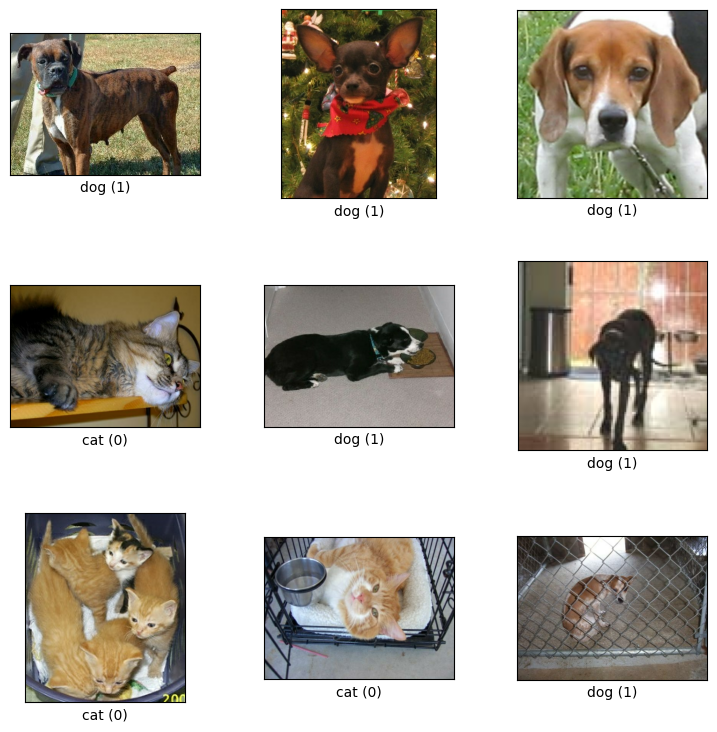

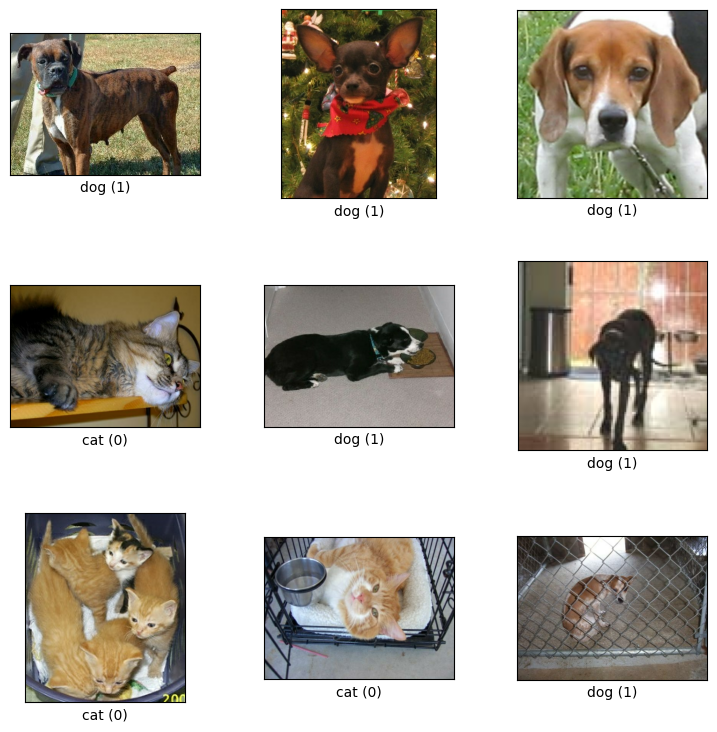

In [217]:
tfds.visualization.show_examples(ds_train, ds_info)

**Step 2-2:**
Preprocess the training data.
Call the preprocess function on the ds_train dataset and pass the ds_info struct.
Your output should look like the following:
- Preprocessing complete.
- The images are now of shape (224, 224, 3).
- After one hot encoding, the labels are of shape (1,).
- The images are now of shape (224, 224, 3).
- After one hot encoding, the labels are of shape (1,).


In [218]:
# Preprocess the training data.
ds_train = preprocess(ds_train, ds_info)

Preprocessing complete.
The images are now of shape (224, 224, 3).
After one hot encoding, the labels are of shape (1,).
The images are now of shape (224, 224, 3).
After one hot encoding, the labels are of shape (1,).


**Step 2-3:**
Preprocess the test data.
Call the preprocess function on the ds_test dataset and pass the ds_info struct.
Your output should look like the following:
- Preprocessing complete.
- The images are now of shape (224, 224, 3).
- After one hot encoding, the labels are of shape (1,).
- The images are now of shape (224, 224, 3).
- After one hot encoding, the labels are of shape (1,).

In [219]:
# Preprocess the test data.
ds_test = preprocess(ds_test, ds_info)

Preprocessing complete.
The images are now of shape (224, 224, 3).
After one hot encoding, the labels are of shape (1,).
The images are now of shape (224, 224, 3).
After one hot encoding, the labels are of shape (1,).


**Step 2-4:**
Create numpy arrays of your ds_train and ds_test datasets.
Hint:  https://www.tensorflow.org/datasets/api_docs/python/tfds/as_numpy

In [220]:
X_train, Y_train = as_numpy(ds_train)
X_test, Y_test = as_numpy(ds_test)

**Step 2-5:**
Call the see_shapes() function to see the sizes of the train, test, and image data.  Your output should be:  (2326, 465, 224).

In [223]:
# Call the see_shapes function to see the shapes of your data.
see_shapes(X_train, X_test, Y_train, Y_test)

import doctest

"""
  >>> print(see_shapes(X_train, X_test, Y_train, Y_test))
  (2326, 465, 224)
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

**Step 2-6:**
Call the flatten() function to flatten the datasets then reshape to a one-row vector.

In [224]:
# Call the function to flatten the images.


X_train, X_test = flatten(X_train,X_test)



In [226]:
# Reshape for clarity.
Y_train = Y_train.reshape(1, X_train.shape[1])
Y_test = Y_test.reshape(1, X_test.shape[1])


import doctest

"""
  >>> print(Y_train.shape)
  (1, 2326)
  >>> print(Y_test.shape)
  (1, 465)
"""

doctest.testmod()

TestResults(failed=0, attempted=2)

### Pseudocode and Equations Overview

In [227]:
### PSEUDOCODE for vectorized gradient descent

# Extract number of examples and number of features from X_train
# Initialize parameters
# Initialize list of costs

# Loop over iterations
  # Compute forward propagation steps to find the activations for all examples
  # Compute the average cost per example
  # Calculate the derivative matrix dZ for all examples
  # Calculate the gradient vectors dw and db
  # Update the weights vector and the bias

  # Append the cost for the iteration to the list of costs.

# Return the learned parameters and the list of costs.

### Parameter Initialization and Feedforward Steps
**Step 2-7:**
We are now ready to begin writing the component functions of the algorithm. Luckily, it turns out that a vectorized approach can use many of the functions we have already written. Parameter initialization will be exactly the same, since we want a vector of weights w (with one weight per feature) initialized randomly and scaled to be small. Again, we only need to initialize the bias b to 0 since there is just one node.
<br>
<br>

$\underline{\text{Forward propagation}}:$
The vectorized equations we'll need to implement forward propagation are shown below.  We define the weights vector *w*, and input matrix *X* where each column represents the *n* independent variables or features for each of the examples (i.e. the *n* independent variables for each input sample), and each row is comprised of the *m* examples of one of the independent variables.

$w=
\begin{bmatrix}
w_1\\
w_2\\
\vdots\\
w_n
\end{bmatrix}
$, $\text{  }$ $X=
\begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \cdots & x^{(m)}_1\\
x^{(1)}_2 & x^{(2)}_2 & \cdots & x^{(m)}_2\\
\vdots & \text{ } & \text{ } & \vdots \\
x^{(1)}_n & \cdots & \text{ } & x^{(m)}_n\\
\end{bmatrix}
$
<br>
<br>

Now, the vector *Z* is comprised of the *m* examples and is equal to the vector operations multiplying our weights times the input and adding the bias.
$Z = \begin{bmatrix} z^{(1)} & z^{(2)} & \cdots & z^{(m)} \end{bmatrix} =
w^TX+b  =
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n \end{bmatrix}
\begin{bmatrix}
x^{(1)}_1 &  \cdots & x^{(m)}_1\\
x^{(1)}_2 &  \cdots & x^{(m)}_2\\
\vdots & \text{ } & \vdots \\
x^{(1)}_n & \cdots & x^{(m)}_n\\
\end{bmatrix}  + b  $
<br>

When we perform the matrix multiplication, we end up with:
$Z = \begin{bmatrix} (w_1x^{(1)}_1 + w_2x^{(1)}_2 + \cdots & w_nx^{(1)}_n) \text{  }
(w_1x^{(2)}_1 + w_2x^{(2)}_2 + \cdots & w_nx^{(2)}_n) \text{  } \cdots
\end{bmatrix} + b$

where b is broadcast across all terms in the vector Z.  See the following link for a more detailed description on broadcasting:  https://numpy.org/doc/stable/user/basics.broadcasting.html.
Note that when we multiply a row vector *w* by the matrix *X*_train produces a row vector Z where the ith component of Z is the dot product of the ith row of w with the ith column of X. In concrete terms, that mean that for the example on the slide, the first component of the new row vector Z is equal to the dot product of the 1st (and only) row of w.T and the 1st column of X_train. If we write this out, we get that the first component of Z = w1*x(1)1 + w2*x(1)2 + w3*x(1)3.
Now, if we add the bias to this using Python broadcasting, we get the same z that we calculated in the unvectorized version. The beauty of the vectorized approach, however, is that in multiplying these matrices we don’t only get the first component of Z but rather the entire vector. That is, we get the z value for each example in X_train, all at once. Pretty efficient!
<br>

We conclude the forward propagation step by applying an activation function on each of the terms:
$A = \begin{bmatrix} a^{(1)} & a^{(2)} & \cdots & a^{(m)} \end{bmatrix} = \sigma(Z) = \begin{bmatrix} \sigma z^{(1)} & \sigma z^{(2)} & \cdots & \sigma z^{(m)} \end{bmatrix}$

<br>
<br>

$\underline{\text{Back propagation}}:$

Next, we perform the backpropagation step which computes the costs and the update parameters for the weights and biases.

$dZ = \begin{bmatrix} dz^{(1)} dz^{(2)} \cdots dz^{(m)}\end{bmatrix}= A-Y=
\begin{bmatrix} (a^{(1)}-y^{(1)}) & (a^{(2)}-y^{(2)}) & \cdots & (a^{(m)}-y^{(m)}) \end{bmatrix}$

$dw = \frac{1}{m}XdZ^T =
\frac{1}{m}
\begin{bmatrix}
\vdots & \text{ } & \vdots \\
x^{(1)} & \cdots & x^{(m)}\\
\vdots & \text{ } & \vdots \\
\end{bmatrix}
\begin{bmatrix}
z^{(1)}\\
z^{(2)}\\
\vdots\\
z^{(m)}
\end{bmatrix} = \frac{1}{m}
\begin{bmatrix}
x^{(1)}_1dz^{(1)} + x^{(2)}_1dz^{(2)} + \cdots & x^{(m)}_1dz^{(m)}\\
\vdots \\
x^{(1)}_ndz^{(1)} + x^{(2)}_ndz^{(2)} + \cdots & x^{(m)}_ndz^{(m)}\\
\end{bmatrix}
$
<br>
<br>
Next, the bias difference terms are updated by computing the sum of the costs and averaging over the *m* examples.
$db = \frac{1}{m}np.sum(dZ)=\frac{1}{m}\begin{bmatrix} dz^{(1)} + dz^{(2)} + \cdots + dz^{(m)} \end{bmatrix} $


In [228]:
# Initialize weights and biases.
def initialize_parameters(dim):

  np.random.seed(3) #do not change - for grading purposes

  w = np.random.randn(dim, 1) * 0.01
  b = 0


  return w, b

In [229]:
def feedforward(w, b, x):


  # Forward propagation.
  z = np.dot(w.T, x) + b
  a = sigmoid_activation(z)


  return a

### Cost Computation

**Step 2-8:**
Now we can make use of Python broadcasting. You can apply the sigmoid_activation() function to the vector Z and get a vector A containing the activations for each example. This time, we can also make a function to compute the cost since it will be neatly contained within a single for loop.  The vectorized approach to cost computation is to use the entire  vectors A and Y_train in the binary cross-entropy loss function. This creates a vector of costs which we can sum to find their cumulative cost. Finally, divide this by m to get the average cost per example. This approach is much cleaner than the unvectorized version since there is no need to use an accumulator.  This means we can write a neatly contained function to calculate the cost. Again, don’t forget the epsilon constant!


In [230]:
def compute_cost(A, Y, m):

  epsilon = 1e-8
  J = (np.dot(Y, np.log(A + epsilon).T) + np.dot(1 - Y, np.log(1 - A + epsilon).T))
  cost = np.squeeze(J)/m #use numpy squeeze() function here


  return cost

### Backpropagation
**Step 2-9:**
With vectorization, we can build a single function to perform backpropagation. First, we can calculate the derivatives dz for each example all at once with vector addition. Recall that dz for a single example = the activation for that example minus the ground truth label for that example. We have vectors A and Y which contain the activations and labels for all examples. Therefore, we can simply calculate the vector dZ as A – Y. In this new vector dZ, the ith component is equal to dz for the ith example.

Accordingly, we can then calculate the gradients with respect to w and b. Recall that for a single example, dwi is equal to the ith feature of x multiplied by the dz for that example. Let’s try to vectorize again and cut out another for loop.  We currently have a row vector dZ and a matrix X_train. Our desired resultant is a column vector dw. The 1st component of dw = (the 1st feature of the 1st example * dz for the first example) + (the 1st feature of the second example * dz for the second example)… and so on until finally we add (the 1st feature of the mth example * dz for the mth example.). For dw2, we use the second feature of each example, and so on, until dwn, for which we use the nth and final feature of x. In the feedforward step, we used np.dot() and passed w.T and X_train to produce the row vector dZ. Since we now want to produce a column vector, we need to switch the order of multiplication, multiplying X_train by dZ transpose. Write this out and double check that you are getting the right resultant vector dw.

Recall that in the unvectorized version of descent, we had to use dw as an accumulator and later divide by the number of examples m. This time, we have set the ith component of dw = to thetotal of the ith feature of x * dz for each example in the set. This means that the ith component in dw is currently the cumulative gradient with respect to the ith weight for all examples. Therefore, the final step is to divide the dw vector by m to get the average gradients.

Next, how should we calculate db in a vectorized way? As you saw earlier, db = dz for a particular example. In the unvectorized approach we accumulated db and divided by m. Therefore, we need to do the same but using the dZ vector. Try and use a numpy function to sum up all the values in dZ and then divide this by m to get the value of db.  Return dw and db from the backpropagation function.

Lastly, we’ll complete weight update within the algorithm itself.


In [231]:
def backpropagation(A, Y, X, m):


  dZ = A - Y
  dw = (1/m) * np.dot(X, dZ.T)
  db = (1/m) * np.sum(dZ)


  return dw, db

### Full Algorithm
**Step 2-10:**
Now its time to put it all together!  Let’s now write the vectorized gradient descent algorithm. Please refer to the pseudocode guide if you get stuck.

Let’s begin by initializing our parameters w and b with the function we defined earlier. Again, we can index into X_train.shape to get the number of features in each example. Then, index into X_train.shape again to retrieve the number examples in the train set. Next, initialize an empty list to contain costs.

We can now enter our first and only for loop over iterations. Calculate the vector A by calling the feedforward() function. Remember to pass in the whole of X_train as your x argument! Then, use your compute_cost() function to calculate the cost, and the backpropagation() function to calculate dw and db. We can now perform weight update in a vectorized way by taking advantage of broadcasting. Instead of looping over the weights, let’s simply use vector addition. First, multiply the column vector dw by the constant learning_rate. This means you now have a column vector containing the update amounts per weight. You can now subtract this vector from the weights vector to perform weight update in a single line of code. Do the same for the bias.


In [232]:
def vectorized_descent(X, Y, num_iterations, learning_rate):

  num_features = X.shape[0]
  w, b = initialize_parameters(num_features)
  print('weights:', w)
  print('biases:', b)

  m = X.shape[1]
  costs = []

  for i in range(num_iterations):

    # Forward propagation.
    A = feedforward(w,b,X)

    # Cost computation.
    cost = compute_cost(A, Y, m)

    # Backpropagation.
    dw, db = backpropagation(A, Y, X, m)

    # Update parameters.
    w = w - learning_rate * dw
    b = b - learning_rate * db


    # Record the costs
    if i % 10 == 0:
        costs.append(cost)

    # Print the cost every 100 training iterations
    if i == 0:
      print ("Cost after iteration %i: %f" %(i, cost))

    elif i % 10 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))

    # Print the cost every 100 training iterations
    if i == num_iterations:
      print ("Cost after iteration %i: %f" %(i, cost))

  return w, b, costs

**Step 2-11:**

You have now completed the vectorized descent algorithm! Now call the vectorized_descent() function with about 1000 iterations and a learning rate of your choice (0.1 is a good idea). You should see the cost after every 10 iterations being printed out as the algorithm runs (this should take 10-20 minutes).


In [233]:
# Call the vectorized_descent function.

w, b, costs = vectorized_descent(X_train, Y_train, num_iterations=1000, learning_rate=0.1)



weights: [[ 0.01788628]
 [ 0.0043651 ]
 [ 0.00096497]
 ...
 [ 0.00083192]
 [-0.00980084]
 [ 0.00845841]]
biases: 0
Cost after iteration 0: -1.645324
Cost after iteration 10: -8.765734
Cost after iteration 20: -8.642027
Cost after iteration 30: -8.449204
Cost after iteration 40: -8.281046
Cost after iteration 50: -8.121639
Cost after iteration 60: -8.065972
Cost after iteration 70: -7.874587
Cost after iteration 80: -7.752630
Cost after iteration 90: -7.685017
Cost after iteration 100: -7.546513
Cost after iteration 110: -7.397058
Cost after iteration 120: -7.280639
Cost after iteration 130: -7.223782
Cost after iteration 140: -7.144599
Cost after iteration 150: -7.039364
Cost after iteration 160: -7.009219
Cost after iteration 170: -6.941743
Cost after iteration 180: -6.883011
Cost after iteration 190: -6.812957
Cost after iteration 200: -6.646078
Cost after iteration 210: -6.571319
Cost after iteration 220: -6.638838
Cost after iteration 230: -6.472129
Cost after iteration 240: -6.578

### Predictions and Evaluations
**Step 2-12:**
Once the code has finished running, you can finally move on to the prediction and evaluation functions. As in your previous prediction function, first extract the number of examples m and initialize an array of zeroes as Y_hat. This time, however, you can simply call your vectorized feedforward() function  to get the row vector of activations A. Lastly, make sure to set a threshold value above which all values in A become 1 and below which all values become 0. It is recommended to use np.where() for this. Call this prediction() function to get predictions for X_train and X_test. You can pass these predictions through to the same evaluation function that you used previously. Notice that train accuracy is high (should be around 100%), but test accuracy is low (around 50%). This time, the disparity is due to the simplicity of the model applied to more complex data, and lack of regularization. The regularization issue will be fixed in later projects!


In [234]:
def predict(w, b, X):


  m = X.shape[1]
  A = feedforward(w,b,X)

  Y_hat = np.where(A >= 0.5,1,0)


  return Y_hat

In [235]:
# Call your new prediction function.


predictions_train = predict(w,b,X_train)
predictions_test = predict(w,b,X_test)


In [237]:
# Calculate train accuracy.

train_accuracy = evaluate(w, b, predictions_train, Y_train)
print(train_accuracy)


99.95700773860705


In [238]:
# Calculate test accuracy.

test_accuracy = evaluate(w,b,predictions_test,Y_test)
print(test_accuracy)


46.236559139784944



## Part 3:  Model Application and Evaluation

**Step 3-1:**

Finally, let’s build the model and compare the speed of the algorithms. We’re going to implement a simple perceptron model which offers the choice of whether we use an unvectorized or vectorized approach to gradient descent.

First, let’s write the vectorized part. We run our descent function to get w, b, and the list of costs. We then call our prediction function to get predictions, and then call our evaluation function to check our performance. That’s it!

Now do the same in the unvectorized block using the unvectorized functions. Notice how clean this model is. One of the good things about having well defined functions is that when things go wrong, it is much easier to debug the issue.



In [241]:
def simple_perceptron_model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, vectorized=True):

  if vectorized:


    # Run vectorized descent to train the perceptron.
    w, b, costs = vectorized_descent(X_train, Y_train, num_iterations, learning_rate)

    # Make predictions.
    predictions_train = predict(w,b,X_train)
    predictions_test = predict(w,b,X_test)

    # Evaluate performance.
    train_acc = evaluate(w,b,predictions_train, Y_train)
    test_acc = evaluate(w,b,predictions_test, Y_test)


    print ("Train accuracy: ", train_acc)
    print ("Test accuracy: ", test_acc)

  else:


    w, b, costs = unvectorized_descent(X_train, Y_train, num_iterations, learning_rate)

    predictions_train = predict(w,b,X_train)
    predictions_test = predict(w,b,X_test)

    # Evaluate performance.
    train_acc = evaluate(w,b,predictions_train,Y_train)
    test_acc = evaluate(w,b,predictions_test,Y_test)


    print ("Train accuracy: ", train_acc)
    print ("Test accuracy: ", test_acc)

  results = {"w": w,
             "b": b,
             "costs": costs}

### Speed Comparison

**Step 3-2:**
Lastly, let’s do a speed comparison. We are going to use the synthesized data for this since the unvectorized approach would take far too long on real data. Run the cell calling create_dataset() and then call your flatten() and normalize() functions  on X_train and X_test.  Next, call the simple_perceptron_model() with X_train and X_test for one iteration with a learning rate of 0.1 and an unvectorized approach. Make sure you do this exactly where we’ve stated in the notebook (this is important for timing). Run the cell and then repeat the process in the next cell, but using a vectorized approach. Print out the times to see the difference. You should see that the vectorized approach is around thousands of times faster!

<br>

**Conclusion:  Vectorization will be a key coding technique in order to keep the processing efficient as we build the Deep Neural Network in the next units!**


In [247]:
X_train, Y_train = create_dataset(80)
X_test, Y_test = create_dataset(20)


# Call the function to flatten the datasets.
X_train, X_test = flatten(X_train,X_test)


# Basic normalization.
X_train, X_test = normalize(X_train, X_test)


In [248]:
# Time for one iteration of unvectorized descent.

import time
t0 = time.time()

#Call the simple_perceptron_model function with unvectorized descent enable
results = simple_perceptron_model(X_train,Y_train,X_test,Y_test,num_iterations=1,learning_rate=0.1,vectorized=False)

#Calculate the time to run unvectorized descent
t1 = time.time()
total_unvec = t1-t0

Cost after iteration 0: 55.748415
Train accuracy:  60.0
Test accuracy:  65.0


In [249]:
# Time for one iteration of vectorized descent.

t0 = time.time()


#Call the simple_perceptron_model function with vectorized descent enabled
results = simple_perceptron_model(X_train,Y_train,X_test,Y_test,num_iterations=1,learning_rate=0.1,vectorized=True)

#Calculate the time to run vectorized descent
t1 = time.time()
total_vec = t1-t0

weights: [[ 1.78862847e-02]
 [ 4.36509851e-03]
 [ 9.64974681e-04]
 [-1.86349270e-02]
 [-2.77388203e-03]
 [-3.54758979e-03]
 [-8.27414815e-04]
 [-6.27000677e-03]
 [-4.38181690e-04]
 [-4.77218030e-03]
 [-1.31386475e-02]
 [ 8.84622380e-03]
 [ 8.81318042e-03]
 [ 1.70957306e-02]
 [ 5.00336422e-04]
 [-4.04677415e-03]
 [-5.45359948e-03]
 [-1.54647732e-02]
 [ 9.82367434e-03]
 [-1.10106763e-02]
 [-1.18504653e-02]
 [-2.05649899e-03]
 [ 1.48614836e-02]
 [ 2.36716267e-03]
 [-1.02378514e-02]
 [-7.12993200e-03]
 [ 6.25244966e-03]
 [-1.60513363e-03]
 [-7.68836350e-03]
 [-2.30030722e-03]
 [ 7.45056266e-03]
 [ 1.97611078e-02]
 [-1.24412333e-02]
 [-6.26416911e-03]
 [-8.03766095e-03]
 [-2.41908317e-02]
 [-9.23792022e-03]
 [-1.02387576e-02]
 [ 1.12397796e-02]
 [-1.31914233e-03]
 [-1.62328545e-02]
 [ 6.46675452e-03]
 [-3.56270759e-03]
 [-1.74314104e-02]
 [-5.96649642e-03]
 [-5.88594380e-03]
 [-8.73882298e-03]
 [ 2.97138154e-04]
 [-2.24825777e-02]
 [-2.67761865e-03]
 [ 1.01318344e-02]
 [ 8.52797841e-03]
 [ 

**Step 3-3**
Print out the time for one iteration of unvectorized descent and one for vectorized.  Note the times, then calculate the speed factor that vectorized descent provides.  That is, calculate the ratio of total_unvec to total_vec.  You should see on the order of 100's of times faster for the vectorized approach!!

In [250]:
# Print the times.
print ("Time for one iteration of unvectorized descent: ", total_unvec)
print ("Time for one iteration of vectorized descent: ", total_vec)

Time for one iteration of unvectorized descent:  0.005750179290771484
Time for one iteration of vectorized descent:  0.007439136505126953


In [251]:
print ("Vectorized version is {} times faster.".format((total_unvec/total_vec)*100))

Vectorized version is 77.29632715851548 times faster.
